In [14]:
from pandas_datareader import data as web

import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from prophet import Prophet

import warnings

warnings.filterwarnings("ignore")

In [15]:
def jupyter_settings():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 30

    sns.set()
jupyter_settings()


#  1.0. Coleta de Dados

In [16]:
# coletando
bovespa = web.DataReader('^BVSP', data_source='yahoo', start='17/08/2022')
mdias = web.DataReader('MDIA3.SA', data_source='yahoo', start='17/08/2022')
brf = web.DataReader('BRFS3.SA', data_source='yahoo', start='17/08/2022')
jbs = web.DataReader('JBSS3.SA', data_source='yahoo', start='17/08/2022')
marfrig = web.DataReader('MRFG3.SA', data_source='yahoo', start='17/08/2022')

# filtrando por fechamento ajustado
bovespa_ = bovespa['Adj Close']
mdias_ = mdias['Adj Close']
brf_ = brf['Adj Close']
jbs_ = jbs['Adj Close']
marfrig_ = marfrig['Adj Close']

# criando dataframe
df = pd.DataFrame([bovespa_, mdias_, brf_, jbs_, marfrig_]).T

# renomeando
cols_new = ['Bovespa', 'MDIAS', 'BRF', 'JBS', 'Marfrig']
df.columns = cols_new

In [21]:
# converter para Excel
df.to_excel('cotacao.xlsx', sheet_name='Planilha', header=True, index=True)

bovespa.to_excel('bovespa_completo.xlsx', sheet_name='Planilha', header=True, index=True)
mdias.to_excel('mdias_completo.xlsx', sheet_name='Planilha', header=True, index=True)
brf.to_excel('brf_completo.xlsx', sheet_name='Planilha', header=True, index=True)
jbs.to_excel('jbs_completo.xlsx', sheet_name='Planilha', header=True, index=True)
marfrig.to_excel('mafrig_completo.xlsx', sheet_name='Planilha', header=True, index=True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-17,114146.000000,112483.000000,113508.0,113708.000000,14652800,113708.000000
2022-08-18,114375.000000,113304.000000,113708.0,113813.000000,10644200,113813.000000
2022-08-19,113807.000000,111146.000000,113807.0,111496.000000,12678600,111496.000000
2022-08-22,111487.000000,109858.000000,111487.0,110501.000000,11010900,110501.000000
2022-08-23,112965.000000,110503.000000,110504.0,112857.000000,11892000,112857.000000
2022-08-24,113888.000000,112632.000000,112856.0,112898.000000,13758600,112898.000000
2022-08-25,114156.000000,112768.000000,112898.0,113532.000000,11838500,113532.000000
2022-08-26,114091.000000,111978.000000,113533.0,112299.000000,11159700,112299.000000
2022-08-29,113222.000000,111689.000000,112296.0,112323.000000,9795800,112323.000000


# 2.0. Exploração dos Dados

In [5]:
df

,Bovespa,MDIAS,BRF,JBS,Marfrig
Date,,,,,
2022-08-17,113708.000000,40.702026,16.959999,32.459999,14.790080
2022-08-18,113813.000000,41.710835,16.690001,32.259998,14.742524
2022-08-19,111496.000000,42.729633,16.410000,32.369999,14.752035
2022-08-22,110501.000000,41.551022,16.270000,31.780001,14.630000
2022-08-23,112857.000000,41.660892,16.360001,31.370001,14.530000
2022-08-24,112898.000000,41.840683,16.610001,30.660000,14.370000
2022-08-25,113532.000000,42.030460,16.469999,30.719999,14.310000
2022-08-26,112299.000000,41.451141,16.530001,29.950001,14.210000
2022-08-29,112323.000000,42.020470,16.370001,30.100000,14.020000


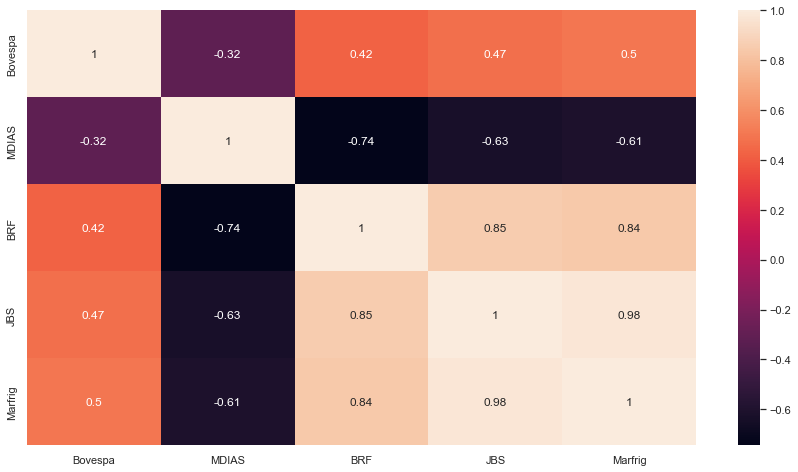

In [6]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation, annot=True);

In [7]:
precos = df[['MDIAS', 'BRF', 'JBS', 'Marfrig']]

In [8]:
precos.reset_index(inplace=True)

In [9]:
precos

,Date,MDIAS,BRF,JBS,Marfrig
0,2022-08-17,40.702026,16.959999,32.459999,14.790080
1,2022-08-18,41.710835,16.690001,32.259998,14.742524
2,2022-08-19,42.729633,16.410000,32.369999,14.752035
3,2022-08-22,41.551022,16.270000,31.780001,14.630000
4,2022-08-23,41.660892,16.360001,31.370001,14.530000
5,2022-08-24,41.840683,16.610001,30.660000,14.370000
6,2022-08-25,42.030460,16.469999,30.719999,14.310000
7,2022-08-26,41.451141,16.530001,29.950001,14.210000
8,2022-08-29,42.020470,16.370001,30.100000,14.020000
9,2022-08-30,44.078045,16.190001,29.990000,13.490000


<AxesSubplot:xlabel='Date', ylabel='Marfrig'>

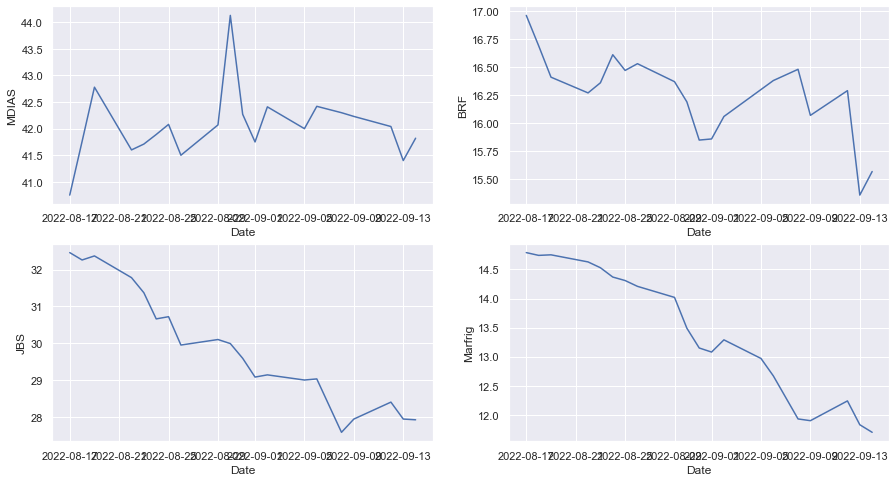

In [48]:
plt.subplot(2, 2, 1)
sns.lineplot(x='Date', y='MDIAS', data=precos)

plt.subplot(2, 2, 2)
sns.lineplot(x='Date', y='BRF', data=precos)

plt.subplot(2, 2, 3)
sns.lineplot(x='Date', y='JBS', data=precos)

plt.subplot(2, 2, 4)
sns.lineplot(x='Date', y='Marfrig', data=precos)